In [1]:
import numpy as np
import pandas as pd 
import matplotlib . pyplot as plt

## Zadatak 1

Koliko mjerenja sadrži DataFrame?Kojeg je tipa svaka velicina? Postoje li izostale ili 
duplicirane vrijednosti? Obrišite ih ako postoje. Kategoricke velicine konvertirajte u tip
category.

In [6]:
data = pd.read_csv('data_C02_emission.csv')
print(len(data))
print(data.info)
print(data.isnull().sum())
data.dropna(axis=0)
categories = data.select_dtypes(include=['object']).columns
for category in categories:
    data[category] = data[category].astype('category')

2212
<bound method DataFrame.info of        Make              Model            Vehicle Class  Engine Size (L)   
0     Acura                ILX                  Compact              2.4  \
1     Acura         MDX SH-AWD               SUV: Small              3.5   
2     Acura  MDX SH-AWD A-SPEC               SUV: Small              3.5   
3     Acura     MDX Hybrid AWD               SUV: Small              3.0   
4     Acura                NSX               Two-seater              3.5   
...     ...                ...                      ...              ...   
2207  Volvo      V60 CC T5 AWD     Station wagon: Small              2.0   
2208  Volvo      V90 CC B6 AWD  Station wagon: Mid-size              2.0   
2209  Volvo        XC60 B5 AWD               SUV: Small              2.0   
2210  Volvo        XC60 B6 AWD               SUV: Small              2.0   
2211  Volvo        XC90 T6 AWD            SUV: Standard              2.0   

      Cylinders Transmission Fuel Type  Fuel Consu

Koja tri automobila ima najvecu odnosno najmanju gradsku potrošnju? Ispišite u terminal:
ime proizvodaca, model vozila i kolika je gradska potrošnja.

In [8]:
max_consumption_city = data.sort_values(by='Fuel Consumption City (L/100km)', ascending=False).head(3)
for index,row in max_consumption_city.iterrows():
    make = row['Make']
    model = row['Model']
    consumption = row['Fuel Consumption City (L/100km)']
    print(f"Make: {make}, Model: {model}, Fuel consumption: {consumption}")

Make: Bugatti, Model: Chiron Super Sport, Fuel consumption: 30.3
Make: Bugatti, Model: Chiron Pur Sport, Fuel consumption: 30.3
Make: Lamborghini, Model: Aventador Sian Coupe, Fuel consumption: 28.3


In [9]:
max_consumption_city = data.sort_values(by='Fuel Consumption City (L/100km)', ascending=True).head(3)
for index,row in max_consumption_city.iterrows():
    make = row['Make']
    model = row['Model']
    consumption = row['Fuel Consumption City (L/100km)']
    print(f"Make: {make}, Model: {model}, Fuel consumption: {consumption}")

Make: Hyundai, Model: IONIQ Blue, Fuel consumption: 4.0
Make: Hyundai, Model: IONIQ Blue, Fuel consumption: 4.2
Make: Hyundai, Model: IONIQ, Fuel consumption: 4.2


Koliko vozila ima velicinu motora izmedu 2.5 i 3.5 L? Kolika je prosjecna C02 emisija
plinova za ova vozila?

In [11]:
engine_filter = data[(data['Engine Size (L)'] >= 2.5) & (data['Engine Size (L)'] <= 3.5)]
print(len(engine_filter))
avg = engine_filter['CO2 Emissions (g/km)'].mean()
print(avg)

714
254.7549019607843


Koliko mjerenja se odnosi na vozila proizvodaca Audi? Kolika je prosjecna emisija C02
plinova automobila proizvodaca Audi koji imaju 4 cilindara?

In [14]:
audi = data[data['Make'] == 'Audi']
print(len(audi))
audi_4_cylinders = audi[audi['Cylinders'] == 4]
avg = audi_4_cylinders['CO2 Emissions (g/km)'].mean()
print(f"{avg:.2f}")

118
215.91


Koliko je vozila s 4,6,8. . . cilindara? Kolika je prosjecna emisija C02 plinova s obzirom na
broj cilindara?

In [20]:
print(data['Cylinders'].value_counts())
avg = data.groupby('Cylinders')['CO2 Emissions (g/km)'].mean()
print(avg)

Cylinders
4     906
6     672
8     516
12     45
3      44
10     22
16      4
5       3
Name: count, dtype: int64
Cylinders
3     184.545455
4     212.575055
5     238.666667
6     269.235119
8     323.325581
10    357.181818
12    415.666667
16    568.750000
Name: CO2 Emissions (g/km), dtype: float64


Kolika je prosjecna gradska potrošnja u slucaju vozila koja koriste dizel, a kolika za vozila 
koja koriste regularni benzin? Koliko iznose medijalne vrijednosti?

In [22]:
mean = data.groupby('Fuel Type')['CO2 Emissions (g/km)'].mean()
median = data.groupby('Fuel Type')['CO2 Emissions (g/km)'].median()
print(mean)
print(median)


Fuel Type
D    271.844828
E    294.510638
X    242.308943
Z    276.035619
Name: CO2 Emissions (g/km), dtype: float64
Fuel Type
D    272.0
E    300.0
X    240.0
Z    269.0
Name: CO2 Emissions (g/km), dtype: float64


Koje vozilo s 4 cilindra koje koristi dizelski motor ima najvecu gradsku potrošnju goriva?

In [23]:
four_cylinders_diesel = data[(data['Cylinders'] == 4) & (data['Fuel Type'] == 'D')]
max_value = four_cylinders_diesel['CO2 Emissions (g/km)'].max()
max_car = four_cylinders_diesel[four_cylinders_diesel['CO2 Emissions (g/km)'] == max_value]
max_car[['Make','Model','Cylinders','Fuel Type','CO2 Emissions (g/km)']]

Make             Model  Cylinders Fuel Type  CO2 Emissions (g/km)
205  Chevrolet  Colorado ZR2 4WD          4         D                   326

Koliko ima vozila ima rucni tip mjenjaca (bez obzira na broj brzina)?

In [24]:
manual_cars = data[data['Transmission'].str.startswith('M')]
print(len(manual_cars))

192


Izracunajte korelaciju izmedu numerickih velicina.

In [25]:
print(data.corr(numeric_only=True))

                                 Engine Size (L)  Cylinders   
Engine Size (L)                         1.000000   0.920905  \
Cylinders                               0.920905   1.000000   
Fuel Consumption City (L/100km)         0.833931   0.841096   
Fuel Consumption Hwy (L/100km)          0.758335   0.740668   
Fuel Consumption Comb (L/100km)         0.821443   0.819981   
Fuel Consumption Comb (mpg)            -0.727070  -0.713412   
CO2 Emissions (g/km)                    0.830467   0.837670   

                                 Fuel Consumption City (L/100km)   
Engine Size (L)                                         0.833931  \
Cylinders                                               0.841096   
Fuel Consumption City (L/100km)                         1.000000   
Fuel Consumption Hwy (L/100km)                          0.925205   
Fuel Consumption Comb (L/100km)                         0.990872   
Fuel Consumption Comb (mpg)                            -0.908601   
CO2 Emissions (g/km

## Zadatak 2

Pomocu histograma prikažite emisiju C02 plinova.

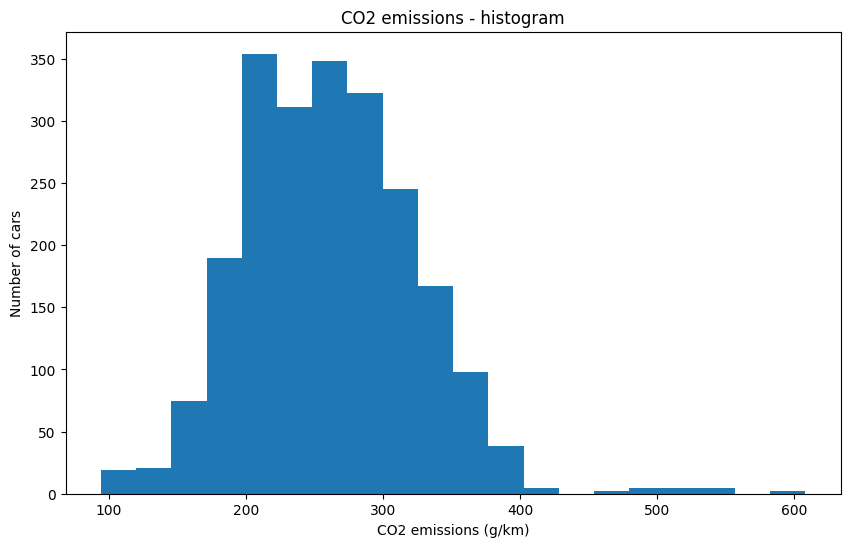

In [27]:
plt.figure(figsize=(10,6))
plt.hist(data['CO2 Emissions (g/km)'], bins=20)
plt.title('CO2 emissions - histogram')
plt.xlabel('CO2 emissions (g/km)')
plt.ylabel('Number of cars')
plt.show()

Pomocu dijagrama raspršenja prikažite odnos izmedu gradske potrošnje goriva i emisije
C02 plinova. Komentirajte dobiveni prikaz. Kako biste bolje razumjeli odnose izmedu
velicina, obojite tockice na dijagramu raspršenja s obzirom na tip goriva.

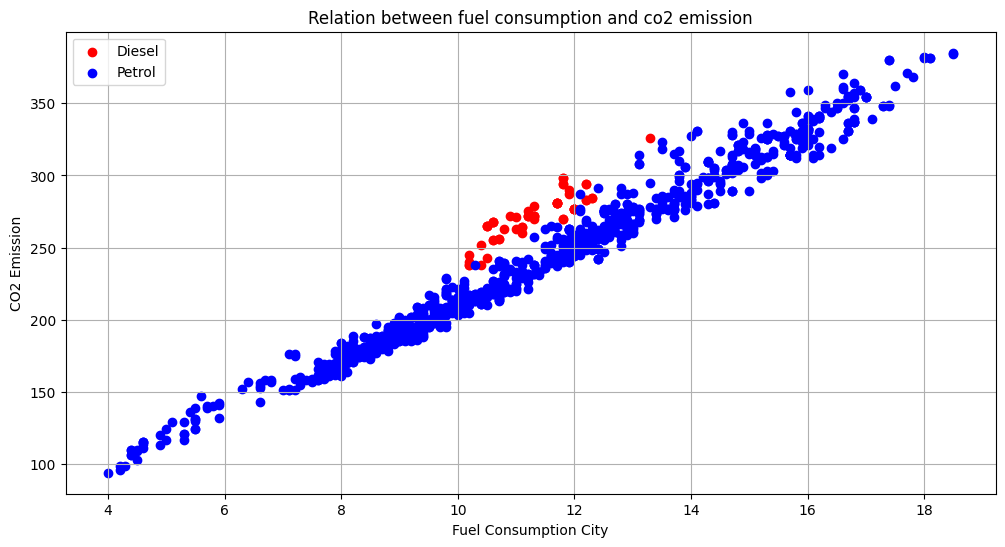

In [29]:
diesel = data[data['Fuel Type'] == 'D']
petrol = data[data['Fuel Type'] == 'X']
plt.figure(figsize=(12,6))
plt.scatter(diesel['Fuel Consumption City (L/100km)'], diesel['CO2 Emissions (g/km)'], color='red', label='Diesel')
plt.scatter(petrol['Fuel Consumption City (L/100km)'], petrol['CO2 Emissions (g/km)'], color='blue', label='Petrol')
plt.title('Relation between fuel consumption and co2 emission')
plt.xlabel('Fuel Consumption City')
plt.ylabel('CO2 Emission')
plt.legend()
plt.grid(True)
plt.show()

Pomocu kutijastog dijagrama prikažite razdiobu izvangradske potrošnje s obzirom na tip
goriva.

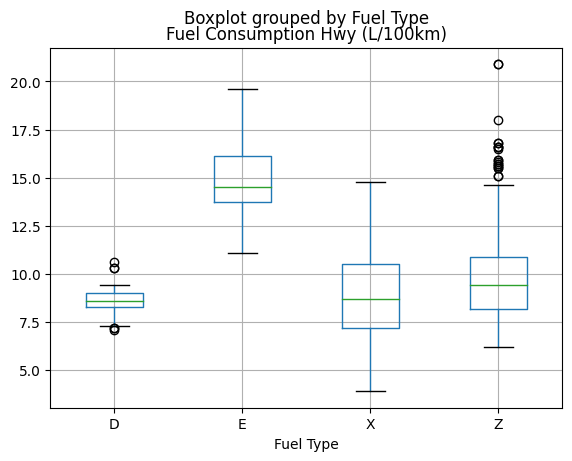

In [30]:
data.boxplot(column='Fuel Consumption Hwy (L/100km)', by='Fuel Type')
plt.show()

a) Pomocu stupcastog dijagrama prikažite broj vozila po tipu goriva. Koristite metodu
groupby.

b) Pomocu stupcastog grafa prikažite na istoj slici prosjecnu C02 emisiju vozila s obzirom na
broj cilindara.

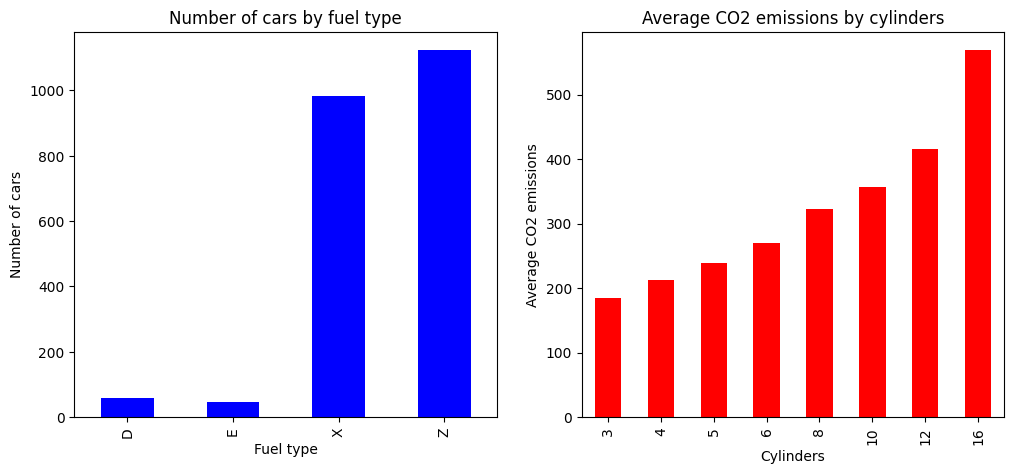

In [39]:
plt.figure(figsize=(12,5))
cars_by_fuel = data.groupby('Fuel Type').size()
CO2_by_cylinders = data.groupby('Cylinders')['CO2 Emissions (g/km)'].mean()
plt.subplot(1,2,1)
cars_by_fuel.plot(kind='bar', color='blue')
plt.title('Number of cars by fuel type')
plt.xlabel('Fuel type')
plt.ylabel('Number of cars')
plt.subplot(1,2,2)
CO2_by_cylinders.plot(kind='bar', color='red')
plt.title('Average CO2 emissions by cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Average CO2 emissions')
plt.show()